### Leerdoelen
- Je leert een Business Understanding te formuleren bij een opdrachtgever en een gegeven dataset. 
- Je leert wat een decision tree is
- Je leert werken met decision trees in Python
- Je leert je conslusies uit het Data Understanding te verbinden aan de uitkomst van je decision tree
- Je leert een keuze tussen decision trees van verschillende complexiteit
- Je leert de voorspellingen van je decision tree beoordelen. 

### Achtergrondinformatie:
- Google naar:
    - `python sklearn decision tree`
    - `python sklearn knn`
    - `description adult dataset`
    - `python seaborn FacetGrid`
    - `pandas create dummy variables`
    - (optioneel) `python sklearn visualise decision tree`
- Datacamp course `Machine Learning with Tree-Based Models in Python` -> `Classification and Regression Trees`

### Opdracht 
- Vul het onderstaande notebook aan op de gevraagde plekken. 

# Business Understanding
De gemeente Boston in de VS worstelt met armoede problematiek. Een probleem voor de gemeente is dat ze geen inzicht hebben in welke factoren van invloed zijn op of een persoon wel of niet arm is. Om dit inzicht te verkrijgen heeft de gemeente jullie benaderd om hier inzicht in te verschaffen. 

- Begrijp je de vraag die gesteld wordt? 
- Heb je voldoende kennis van het domein (auto’s) om de data te kunnen begrijpen?

# Les 1
# Data Understanding

In [1]:
# [10 min] Importeer hier de relevante bibiliotheken en daarna het gegeven bestand. 
# Voer hier je Data Understanding uit zoals je gewend bent

import pandas as pd
import matplotlib as plt
import seaborn as sns


In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,above_or_below_50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.dtypes

age                    int64
 workclass            object
 fnlwgt                int64
 education            object
 education-num         int64
marital-status        object
occupation            object
relationship          object
race                  object
sex                   object
capital-gain           int64
capital-loss           int64
hours-per-week         int64
native-country        object
above_or_below_50k    object
dtype: object

In [5]:
df['above_or_below_50k'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


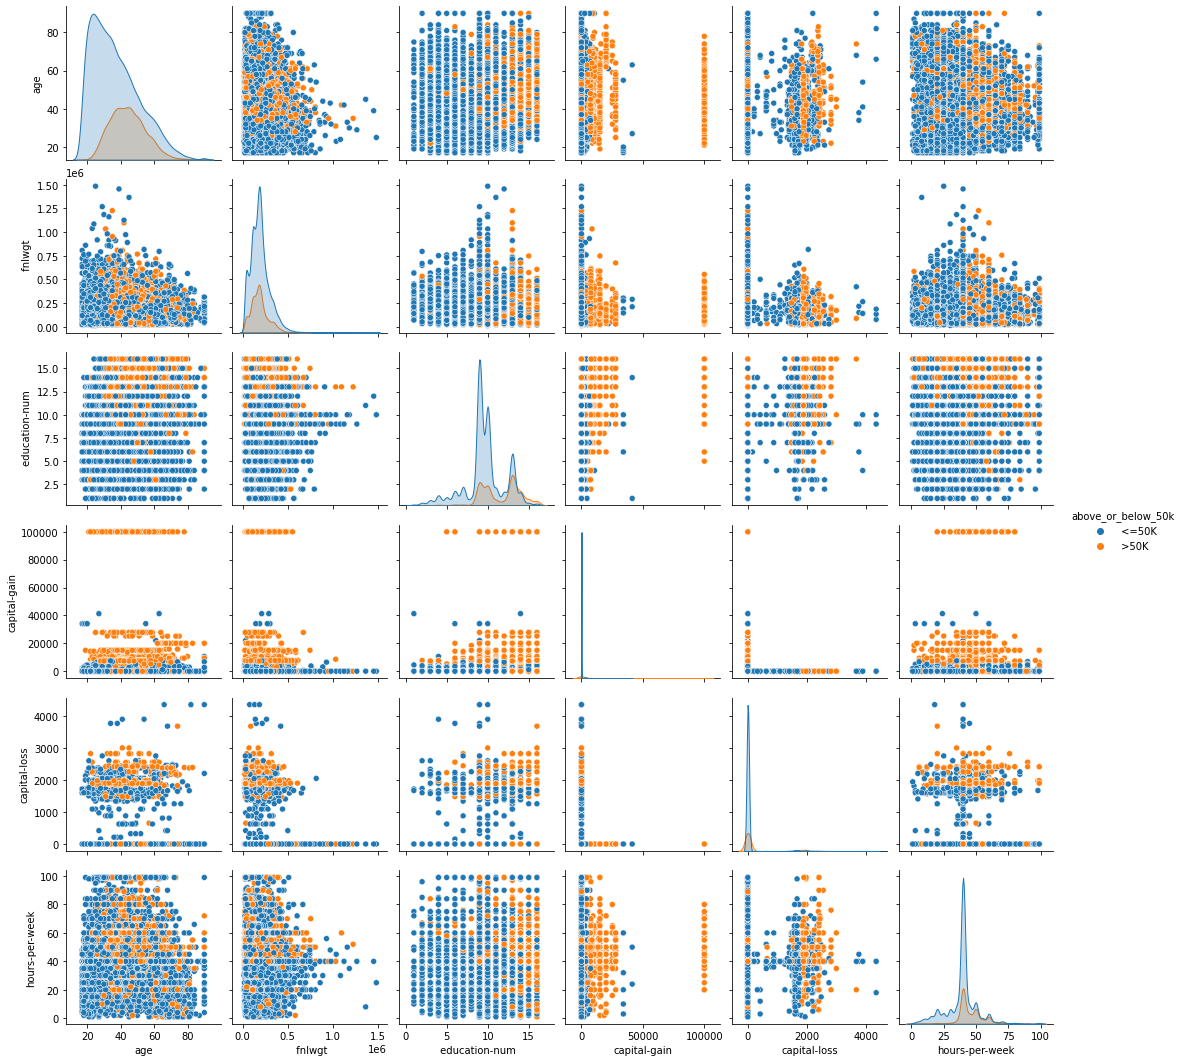

In [9]:
sns.pairplot(df, hue='above_or_below_50k')

**Een van de consultants van de klant heeft al een stuk analyse uitgevoerd. Zijn hypothese was dat opleidingsniveau, sekse en leeftijd een grote rol spelen. Hieronder staat zijn analyse (code+illustratie). Wat is jou inschatting? Ben je het eens met de inschatting van de consultant van de klant?**

In [ ]:
# [10 min] Op dit moment zijn de labels in kolom above_or_below_50k aangegeven met ' <=50K' en ' >50K'. Let op de spaties in de tekst.
# Voor de leesbaarheid willen we dit vervangen met 'below' en 'above'. Vervang de data in de kolommen hiermee.



In [16]:
# Lambda methode

def demofunctie1(x):
    return x*2

demofunctie2 = lambda x: x*2

demofunctie1(4), demofunctie2(4)

(8, 8)

In [19]:
# Optie 1 - lambda
df['above_or_below_50k'].apply(lambda record: 'below' if record == ' <=50K' else 'above')

0        below
1        below
2        below
3        below
4        below
         ...  
32556    below
32557    above
32558    below
32559    below
32560    above
Name: above_or_below_50k, Length: 32561, dtype: object

In [21]:
# Optie 2 - complexere functie
def functie_above_or_below(record):
    
    if record == ' <=50K':
        return 'below'
    
    return 'above'

df['above_or_below_50k'].apply(functie_above_or_below)

0        below
1        below
2        below
3        below
4        below
         ...  
32556    below
32557    above
32558    below
32559    below
32560    above
Name: above_or_below_50k, Length: 32561, dtype: object

In [22]:
# Optie 3 - dictionary mapping

mapping_dict = {
    ' <=50K' : 'below',
    ' >50K' : 'above'
}

df['above_or_below_50k'].map(mapping_dict)



0        below
1        below
2        below
3        below
4        below
         ...  
32556    below
32557    above
32558    below
32559    below
32560    above
Name: above_or_below_50k, Length: 32561, dtype: object

In [29]:
df['threshold'] = df['above_or_below_50k'].map(mapping_dict)

In [32]:
def get_pct_above_50k(vec):
    cnt = vec.value_counts()
    try:
        return 100 - ((cnt['below'] / sum(cnt)) * 100)
    except KeyError:
        return 100
    
res = df[[' education-num', 'sex', 'age', 'threshold']] \
          .groupby([' education-num', 'sex', 'age'])\
          .agg(get_pct_above_50k).reset_index()
res.head()

,education-num,sex,age,threshold
0,1,Female,23,0.0
1,1,Female,24,0.0
2,1,Female,31,0.0
3,1,Female,32,0.0
4,1,Female,34,0.0


C:\Users\fz0121920\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


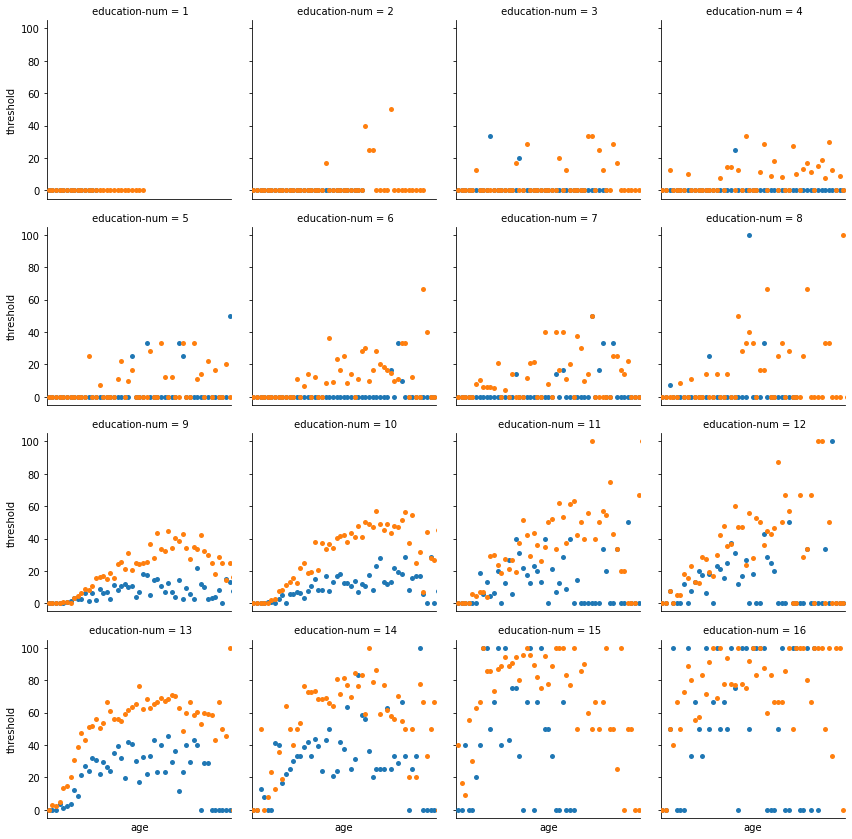

In [35]:
g = sns.FacetGrid(res, col=' education-num', hue='sex', col_wrap=4)
h = g.map(sns.stripplot, 'age', 'threshold', jitter=False)
g.set(xticks=[])

In [ ]:
## [5 min] Wat vind je van de hypothese van de consultant van de klant? Onderbouw je mening vanuit de gegeven illustratie


# Data Preparation
**Prepareer de data voor de modeling stap.** 

In [45]:
# Splits in afhankelijke en onafhankelijke kolommen
afhankelijke = df['threshold'].copy()
onafhankelijke = df[['sex', ' education-num', 'age']].copy()

In [48]:
onafhankelijke['sex'] = pd.get_dummies(df['sex'], drop_first=True)

In [57]:
# Demo hoe je meerdere dummy kolommen je dataframe ingooit (niet relevant voor de les)
dummy_columns = pd.get_dummies(df[' workclass'], drop_first=True)
df[dummy_columns.columns] = dummy_columns

In [58]:
afhankelijke.head()

0    below
1    below
2    below
3    below
4    below
Name: threshold, dtype: object

In [59]:
onafhankelijke.head()

,sex,education-num,age
0,1,13,39
1,1,13,50
2,1,9,38
3,1,7,53
4,0,13,28


# Modeling: het leeftijdsmodel
**Maak hier een decision tree model tussen boven of onder 50k dollar en de leeftijd. Beoordeel de performance met behulp van een confusion matrix en de f1 score. Wat zijn je observaties?**

In [60]:
## [20 min] Importeer vanuit sklearn de volgende onderdelen: DecisionTreeClassifier, train_test_split, f1_score, confusion_matrx
## Splits je dataset in een trainingset en een testset
## Fit vervolgens een beslissingsboom via de DecisionTreeClassifier functie en geef daar de confusion matrix voor
## Wat is de F1 score voor je model? Wat betekend dit?

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
                                            
    

In [62]:
onafhankelijke_train, onafhankelijke_test, afhankelijke_train, afhankelijke_test = train_test_split(onafhankelijke, afhankelijke, test_size=0.3)

In [63]:
onafhankelijke.shape, onafhankelijke_train.shape, onafhankelijke_test.shape

((32561, 3), (22792, 3), (9769, 3))

In [65]:
# model fit
model = DecisionTreeClassifier().fit(onafhankelijke_train, afhankelijke_train)

In [69]:
(model.predict(onafhankelijke_test) == afhankelijke_test).sum()

7777

In [70]:
confusion_matrix(afhankelijke_test, model.predict(onafhankelijke_test) )

array([[ 992, 1285],
       [ 707, 6785]], dtype=int64)

In [75]:
f1_score(afhankelijke_test, model.predict(onafhankelijke_test), pos_label='above')

0.4989939637826962

In [76]:
f1_score(afhankelijke_test, model.predict(onafhankelijke_test), pos_label='below')

0.8719958874180695

In [ ]:
# [10 min] Optioneel: deel de rijen van de confusion matrix door de som van de rij. Dan krijg je de fractie die valt in die categorie.

# Les 2
# Modeling: alle modellen
**[60 min] Maak hier een aantal decision tree modellen met alle combinaties van de onafhankelijke variabelen age, sex, education en. Dit levert een set aan decision tree modellen. Maak de performance van de modellen inzichtelijk via een confusion matrix en de f1_score. Wat zijn je observaties?**

In [ ]:
# [20 min] maak een functie waarin het decision tree model wordt getraind o.b.v. ……. en die de f1-score en confusion matrix voor dit model terug geeft,

In [ ]:
# [30 min] Met de onafhankelijke variabelen leeftijd, geslacht en opleiding kunnen we met zes (berekening: 3!) verschillende 
# decision tree modellen alle mogelijke model-alternatieven bekijken. Train deze zes decision tree modellen en vergelijk 
# de f1-scores en confusion matrices voor deze modellen.  


In [ ]:
# [10 min] Welk model adviseer jij om te gebruiken? Onderbouw je antwoord m.b.v. de f1_scores en confusion matrices. 

In [ ]:
# [20 min] Maak voor het geadviseerde model ook een visualisatie van de daadwerkelijk boomstructuur. 
# Voor inspiratie over hoe dit moet gebruik de volgende link: https://scikit-learn.org/stable/modules/tree.html

# Evaluation
**[10 min] Vul dit aan vanuit je Modeling. Welke inzichten kunnen wij de gemeente Boston geven over factoren die van invloed zijn op armoede m.b.v. het geadviseerde decision tree model. Neem hier de f_score, de confusion matrices en de gevisualiseerde boom in mee.**